Aim: 
Classification using Deep neural network (Any One from the following)
1. Multiclass classification using Deep Neural Networks: Example: Use the OCR letter 
recognition datasethttps://archive.ics.uci.edu/ml/datasets/letter+recognition
2. Binary classification using Deep Neural Networks Example: Classify movie reviews into
positive" reviews and "negative" reviews, just based on the text content of the reviews.
Use IMDB dataset

## Importing Libraries
---

Classification using Deep neural network (Any One from the following)  
 Binary classification using Deep Neural Networks Example: Classify movie reviews intopositive" reviews and "negative" reviews, just based on the text content of the reviews.Use IMDB dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [4]:
df.sample(5)

,review,sentiment
9946,"This warning against anti-semitism is well-meant and may have had its purpose at the time, but it is made without the slightest notion of how to make a film. The director has no idea about mise-en-scene; the cast varies from bad till even worse.<br /><br />The great Austrian comic Hans Moser is wasted. In his part he ends in an asylum for the crazy, that is designed as a set from Das Kabinett des Dr. Caligari; one wonders whether the makers had all their mental capabilities.<br /><br />The restored copy I saw (Dutch Filmmuseum) gives the impression that some scenes were not put into the right place, but may be the original editing was bad as well.",negative
33719,"Oppenheimer was a GREAT series (it was the first thing I saw Waterston in) and it is too bad copies aren't available. A similar situation exists for ""Glory Enough for All"", a British series from around the same time, about the discovery of insulin. I would pay a good price for both of these on DVD. Is it really so difficult to get Oppenheimer on a DVD that is able to be played in the US? Another very enjoyable series, again from about the same time, was ""Danger UXB"". A series about defusing UneXploded Bombs, hence the name. That one you can get from your local library.<br /><br />Pete",positive
15585,"An EXTREMELY fast paced,exhilarating, interesting, detail rich book. Its a huge shame that the film had none of these qualities. not only was Tom Hanks' mild mannered portrayal or Robert Langdon Laughable, but the name changes to key characters, huge deviances from the original story line, and poor Irish/Italian accent from Carmalengo Played by Ewan Mcgregor, made for the worst book to film EVER.<br /><br />As a huge fan of A&D the book, i had high hopes for a more lavish, true to book detailed movie, where it would start and finish just as the book did - leaving me wanting more.<br /><br />All the film really did was depress me within the 1st 10 minutes.<br /><br />what was impressive was how the... sorry! i couldn't even finish that sentence without laughing.<br /><br />in short - Vittoria was the token hottie, a very second to Audrey Tatou and there were some very nice Alfa Romeos.<br /><br />i would recommend reading the book to understand that, if Ron Howard must insist on making ANOTHER book to film, i would be happy saving my £6.40 for a KFC zinger meal and some chicken wings - far more entertaining and deeply more satisfying!",negative
7686,"Certainly expected more after seeing the cast list, but WOW!<br /><br />I think a first time director could have done a better job with this project, and the fact that a veteran like John Buechler made it, puzzles me to no end. Somehow, the budget allowed them to secure a bevy of D-List actors, whom they succeeded in embarrassing for an hour and a half. The unknown actors were just plain awful, less Steve Wastell who does a decent job as Axl. The story is so bad, that it really needs no mention. The overall production value seems standard, with some above average camera work, if you can make it through the God-Awful ""slo-mo"" scenes and the painful ""person on fire"" sequences. I knew it would be dumb, I just had no idea how dumb, and unfortunately it's time spent that can never be returned to me. I suppose if you enjoy really bad ""B"" films, this might work for you, but if you value any story at all, this one is simply dreadful... A complete waste of time.",negative
35883,"After the usual chase scene, Jerry accidentally winds up inside a bottle of invisible ink, which was part of a chemistry set. He quickly discovers he's invisible...so the predictable results occur, meaning he uses his new hidden condition to torment Tom. Jerry often is just defending himself, but often he has sadistic streak in him that torments the cat whenever possible, even when unprovoked.<br /><br />Here, he makes Tom think his eyes are deceiving him when cheese from a mousetrap disappears before his eyes, or milk from a

In [5]:
df.shape

(50000, 2)

In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",positive
freq,5,25000


In [7]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [8]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",positive
freq,5,25000


Checking for duplicates

In [9]:
print(f"Number of Duplicates in the Data: {df.duplicated().sum()}")
print(f"Number of Nulls in the Data: \n {df.isnull().sum()}")

Number of Duplicates in the Data: 418
Number of Nulls in the Data: 
 review       0
sentiment    0
dtype: int64


## Preprocessing
---

In [10]:
X = df['review'][:10000]
y = df['sentiment'][:10000]

Label Encoding the output labels


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [13]:
le.classes_ # [0, 1]

array(['negative', 'positive'], dtype=object)

## Train Test Split
---

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
y_train = y_train.astype('float32').reshape((-1, 1))
y_test = y_test.astype('float32').reshape((-1, 1))

In [16]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8000,) (2000,)
(8000, 1) (2000, 1)


## Model Building
---

In [17]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, Dense, LSTM, Embedding, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

# max_features = 30000 # Number of words in our vocabulary
max_len = 512 # length of the output vectors

In [18]:
vectorize_layer = TextVectorization(output_mode = 'int', output_sequence_length = max_len)

Creating Vocabulary

In [19]:
%%time
vectorize_layer.adapt(X_train) 

CPU times: user 1.07 s, sys: 64.6 ms, total: 1.13 s
Wall time: 1.48 s


In [20]:
vocab_len = len(vectorize_layer.get_vocabulary())
vocab_len

66753

In [21]:
model = Sequential()
model.add(Input(shape=(1,), dtype = tf.string))
model.add(vectorize_layer)
model.add(Embedding(input_dim = vocab_len, output_dim = 256, input_length= max_len))
model.add(Conv1D(32, 5, strides = 1,activation= 'relu', padding = 'same', kernel_regularizer = l2(0.0001)))
model.add(Conv1D(16, 5, strides = 1,activation= 'relu', padding = 'same', kernel_regularizer = l2(0.0001)))
model.add(MaxPooling1D(4, 1, padding = 'same'))
model.add(tf.keras.layers.Bidirectional(LSTM(64, kernel_regularizer = l2(0.0001))))
model.add(Dense(32, activation = 'relu', kernel_regularizer = l2(0.0001)))
model.add(Dense(16, activation = 'relu', kernel_regularizer = l2(0.0001)))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [23]:
model.compile(optimizer= optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 512)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 512, 256)          17088768  
                                                                 
 conv1d (Conv1D)             (None, 512, 32)           40992     
                                                                 
 conv1d_1 (Conv1D)           (None, 512, 16)           2576      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 512, 16)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 128)              4

In [24]:
%%time
hist = model.fit(X_train, y_train,
          epochs= 6, validation_data = (X_test, y_test))

Epoch 1/6
250/250 [==============================] - 82s 266ms/step - loss: 0.6371 - accuracy: 0.6471 - val_loss: 0.6026 - val_accuracy: 0.6830
Epoch 2/6
250/250 [==============================] - 42s 170ms/step - loss: 0.4526 - accuracy: 0.8049 - val_loss: 0.5692 - val_accuracy: 0.7290
Epoch 3/6
250/250 [==============================] - 33s 132ms/step - loss: 0.2263 - accuracy: 0.9234 - val_loss: 0.6082 - val_accuracy: 0.7860
Epoch 4/6
250/250 [==============================] - 34s 135ms/step - loss: 0.1148 - accuracy: 0.9685 - val_loss: 0.7868 - val_accuracy: 0.7610
Epoch 5/6
250/250 [==============================] - 24s 96ms/step - loss: 0.0483 - accuracy: 0.9908 - val_loss: 0.8052 - val_accuracy: 0.7860
Epoch 6/6
250/250 [==============================] - 19s 75ms/step - loss: 0.0271 - accuracy: 0.9970 - val_loss: 0.9582 - val_accuracy: 0.7970
CPU times: user 3min, sys: 5.62 s, total: 3min 6s
Wall time: 4min 25s


I tried with multiple parameters of the network

Conv1D(256, 20) [epoch =2] -->  loss: 0.5941 - accuracy: 0.6189 - val_loss: 0.6664 - val_accuracy: 0.5703   
Conv1D(32, 3) [epoch =2] --> loss: 0.6741 - accuracy: 0.5568 - val_loss: 0.6875 - val_accuracy: 0.5354  
Conv1D(32, 5) [epoch =2] --> loss: 0.6629 - accuracy: 0.5644 - val_loss: 0.6804 - val_accuracy: 0.5449  
Conv1D(64, 5) + MaxPooling1D + Flatten [epoch =2] --> loss: 0.1967 - accuracy: 0.9290 - val_loss: 0.4606 - val_accuracy: 0.8110   
Conv1D(64, 5) + MaxPooling1D + LSTM + Flatten [epoch =2] --> loss: 0.4598 - accuracy: 0.7910 - val_loss: 0.7151 - val_accuracy: 0.6050  
Conv1D(64, 5) + MaxPooling1D + LSTM  [epoch =2] --> loss: 0.3909 - accuracy: 0.8472 - val_loss: 0.5533 - val_accuracy: 0.7510   
Conv1D(64, 5) + MaxPooling1D + LSTM(36) + Flatten [epoch =2] --> loss: 0.3613 - accuracy: 0.8537 - val_loss: 0.5601 - val_accuracy: 0.7470  
Conv1D(128, 6) + MaxPooling1D + LSTM(64) + Flatten [epoch =2] --> loss: 0.3425 - accuracy: 0.8702 - val_loss: 0.5211 - val_accuracy: 0.7600  
Conv1D(64, 6) + MaxPooling1D + LSTM(64) + Dense(128) + Flatten [epoch =2] --> loss: 0.4164 - accuracy: 0.8192 - val_loss: 0.6391 - val_accuracy: 0.6890  
Conv1D(64, 5) + Conv1D(32, 3) + MaxPooling1D + LSTM(32) + Dense(32) + regularization + Flatten [epoch = 10] --> loss: 0.0842 - accuracy: 0.9923 - val_loss: 0.6698 - val_accuracy: 0.8255  
Data = 10000 Conv1D(64, 5) + Conv1D(32, 3) + MaxPooling1D + LSTM(32) + Dense(64) + Dense(32) + regularization + Flatten [epoch = 10] --> loss: 0.1003 - accuracy: 0.9970 - val_loss: 0.6149 - val_accuracy: 0.8425

## Model Evaluation
---

Plotting Model Accuracy Performance

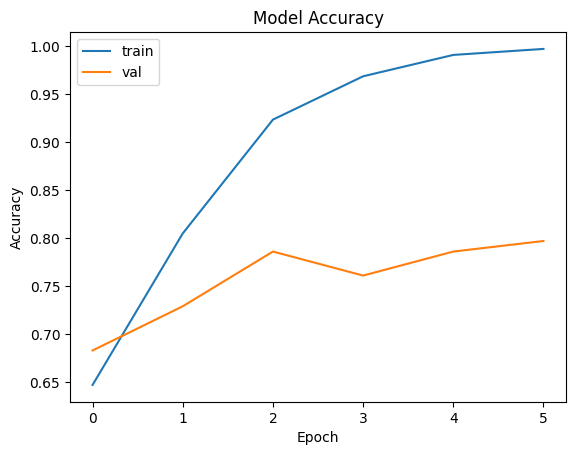

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

Plotting Model Loss Performance

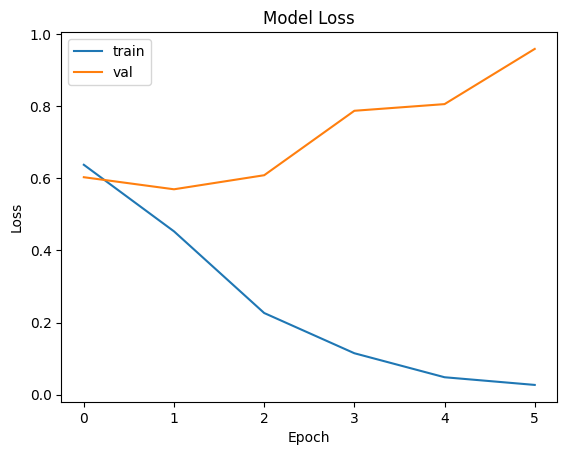

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

## Prediction
---

In [28]:
pred = model.predict(['''So, I'm wondering while watching this film, did the producers of this movie get to save money on Sandra Bullock's wardrobe by dragging out her "before" clothes from Miss Congeniality? Did Ms. Bullock also get to sleepwalk through the role by channeling the "before" Gracie Hart? As many reviewers have noted before, the film is very formulaic. Add to that the deja vu viewer experiences with the character of Cassie Maywether as a somewhat darker Gracie Hart with more back story and it rapidly become a snooze fest.<br /><br />The two bad boy serial killers have been done before (and better) in other films. As has the "good guy partner trying to protect his partner despite the evidence" character been seen before. In fact none of the characters in the film ever get beyond two dimensions or try to be anything but trite stereotypes.<br /><br />One last peeve - using the term serial killer is false advertising. Murdering one person - even if it's a premeditated murder - does not make you a serial killer. You may have the potential to become a serial killer but you are not a serial killer or even a spree killer.''',])

1/1 [==============================] - 0s 43ms/step


In [29]:
pred > 0.5

array([[False]])

In [30]:
pred2 = model.predict(['''Petter Mattei's "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we encounter.<br /><br />The acting is good under Mr. Mattei's direction. Steve Buscemi, Rosario Dawson, Carol Kane, Michael Imperioli, Adrian Grenier, and the rest of the talented cast, make these characters come alive.<br /><br />We wish Mr. Mattei good luck and await anxiously for his next work.'''])

1/1 [==============================] - 0s 42ms/step


In [31]:
pred2 > 0.5

array([[ True]])

In [32]:
pred2

array([[0.99996936]], dtype=float32)

Defining a function for inference, in this function we will assume a negative sentiment if prediction not greater than 0.5 and positive sentiment if prediction is greater than 0.5

In [33]:
def predict_sentiment(text, model):
    text = [text]
    pred = model.predict(text)
    print(pred)
    if pred > 0.5:
        return "Positive"
    else:
        return "Negative"

In [34]:
pst_txt = '''One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.'''
predict_sentiment(pst_txt, model)

1/1 [==============================] - 0s 42ms/step
[[0.9996184]]


'Positive'

In [35]:
ngt_txt ='''Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.'''
predict_sentiment(ngt_txt, model)

1/1 [==============================] - 0s 41ms/step
[[0.00434985]]


'Negative'

In [36]:
ngt_txt2 = '''It's become extremely difficult to find a good horror movie anymore, thought this movie was a good thriller.<br /><br />Could have had better production values but what kept me going was the suspense and the twists. I had real reservations before seeing this movie (because of the cover). I was afraid that it would be excessively bloody and gory. I was wrong.<br /><br />Although there is a lot of scary parts, there is a lot of suspense and drama too.<br /><br />The acting in Dead Line was better than what you would expect from a micro budget horror flick. The characters were believable<br /><br />The movie is really thrilling and quite scary at moments so it makes you grab your seat until the ending credits roll<br /><br />Because of its production values (the sound is not very good for example) 8/10.'''
predict_sentiment(ngt_txt2, model)

1/1 [==============================] - 0s 43ms/step
[[0.9980287]]


'Positive'

In [ ]:
text3 = '''This movie is incredible. If you have the chance, watch it. Although, a warning, you'll cry your eyes out. I do, every time I see it, and I own it and have watched it many times. The performances are outstanding. It deals with darkness and pain and loss, but there is hope. This movie made me look at the world differently: vicarious experience, according to my English teacher. Also, if you've seen it, note the interesting use of shadows and light. Home room is a phenomenal movie, and I rate it 10/10 - for real - because of the excellent acting, amazing plot, and heart-wrenching dialogue. Very tense, very moving. Doesn't give all the answers, but makes many good points about humankind'''
predict_sentiment(text3, model)

## Loading the model
---

In [37]:
txt = '''What a frustrating movie. A small Southern town is overflowing with possibilities for exploring the complexities of interpersonal relationships and dark underbellies hidden beneath placid surfaces, as anyone who has read anything by Carson McCullers already knows. This does none of that. Instead, the writers settled for cutesy twinkles, cheap warm fuzzies and banal melodrama. The thing looks like a made-for-TV movie, and was directed with no particular distinction, but it's hard to imagine what anyone could have done to make this material interesting.<br /><br />The most frustrating aspect, though, is the fact that there are a lot of extremely competent and appealing actors in this cast, all trying gamely to make the best of things and do what they can with this--well, there's no other word for it--drivel. A tragic waste of talent, in particular that of the great Stockard Channing.'''
predict_sentiment(txt, model)

1/1 [==============================] - 0s 45ms/step
[[0.00088167]]


'Negative'